In [6]:
from bs4 import BeautifulSoup
import requests
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

Вводим url сайта, который нужно парсить и получаем код элемента при помощи BeautifulSoup

In [7]:
url = "https://ru.investing.com/currencies/usd-rub-historical-data"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'lxml')

Далее требуется найти общий класс для строки, содержащей время и курс, и пройтись по всем строкам на странице.
Для обработки зеленых и красных значений было использовано две переменные usd и usd_red. Дата для обоих типов usd едина.
Данные собираются при помощи получения класса, в котором находится текстовая информация

In [8]:
data_time = []
data_usd = []
amount = soup.findAll('tr', class_='relative h-[41px] after:absolute after:bottom-0 after:left-0 after:right-0 after:h-px after:bg-[#ECEDEF] hover:bg-[#F5F5F5] historical-data-v2_price__atUfP')
for course in amount:

    usd = course.find('td', class_='datatable_cell__LJp3C datatable_cell--align-end__qgxDQ datatable_cell--up__hIuZF min-w-[77px] text-right align-middle text-sm font-normal leading-5 rtl:text-right text-positive-main')
    usd_red = course.find('td', class_='datatable_cell__LJp3C datatable_cell--align-end__qgxDQ datatable_cell--down___c4Fq min-w-[77px] text-right align-middle text-sm font-normal leading-5 rtl:text-right text-negative-main')
    date = course.find('td', class_='datatable_cell__LJp3C sticky left-0 min-w-[106px] overflow-hidden text-ellipsis whitespace-nowrap bg-white text-left align-middle text-sm font-semibold leading-4 text-v2-black sm:bg-inherit')
    usd_text = usd.text.strip() if usd else usd_red.text.strip()
    date_text = date.text.strip() if date else None
    data_usd.append(usd_text)
    data_time.append(date_text)

Требуется преобразовать даты в вид, подходящий для отрисовки графика. Так же нужно преобразовать в числа данные курса, т.к без этого будут выводится абсолютно все элементы без округления и шага.

In [9]:
dates = [datetime.strptime(date, '%d.%m.%Y') for date in data_time]
data_usd_num = [float(value.replace(',', '.')) for value in data_usd]





В этой части задается размер графика, marker = 0 отвечает за точечный график, далее идут описание его названия и осей.
Дата обрезается до ДД.ММ и поворачивается, во избежание накладывания друг на друга.

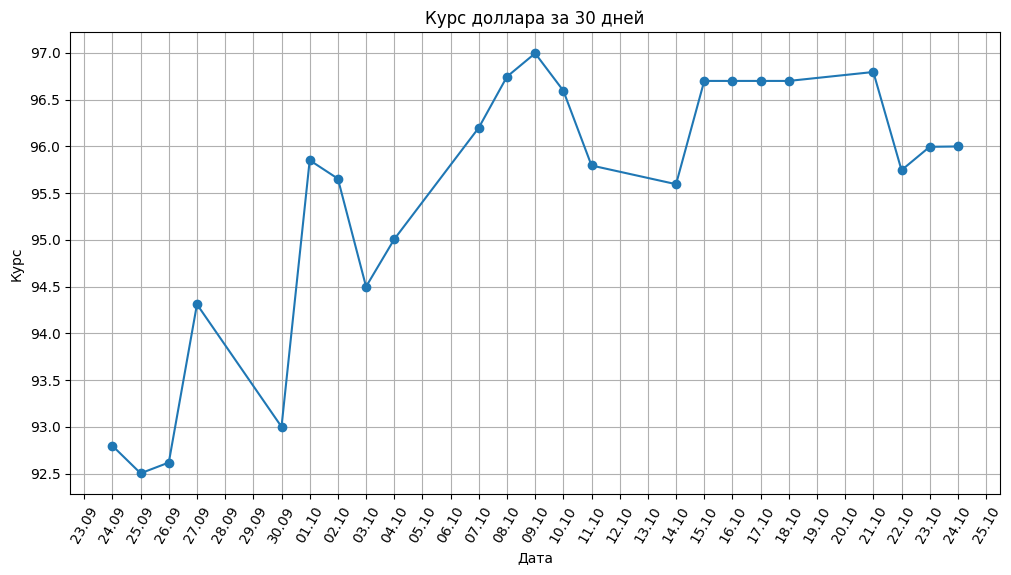

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(dates, data_usd_num, marker='o')
plt.title('Курс доллара за 30 дней')
plt.xlabel('Дата')
plt.ylabel('Курс')
myFmt = mdates.DateFormatter('%d.%m')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=60)
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.5))
plt.grid(True)
plt.show()